# Dimitrios Loupas 4387- Computational Biophysics course 

## SOC P.BAK PAPER GRAPHS

###### P. Bak, C. Tang, and K. Wiesenfeld, Phys. Rev. Lett. $\textbf{59}$, 381 (1987)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [18]:
#import data
f=np.loadtxt("freq.txt")
s = np.loadtxt("aval.txt")
ft=np.loadtxt("freq_t.txt")
t=np.loadtxt("t.txt")

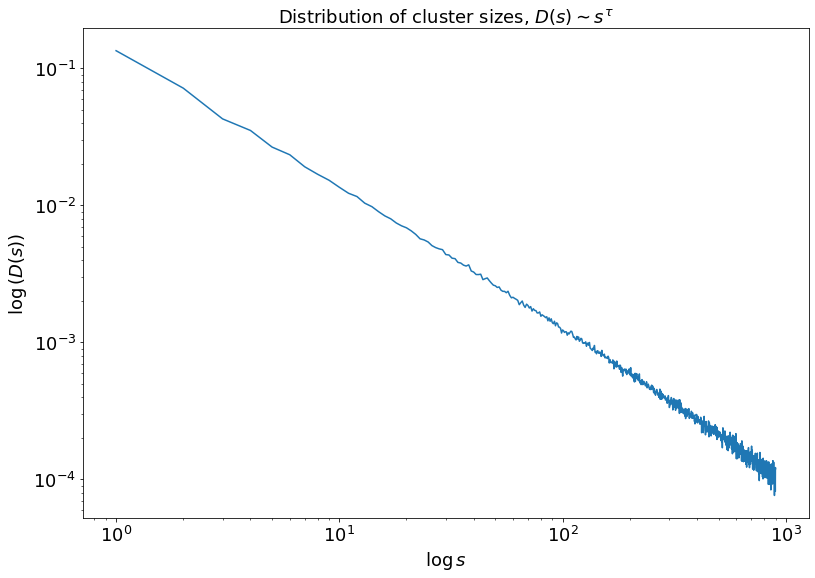

In [36]:
#Distribution of cluster sizes
plt.figure(figsize=(13,9))
plt.plot(s[:900],f[:900])
#plt.plot(x_vals, exp(x_vals, 10**(popt[0]), popt[1]),'r',label='linear model')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\log{s}$",fontsize=18)
plt.ylabel("$\log{(D(s))}$",fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.title("Distribution of cluster sizes, $D(s)\sim s^{τ}$",fontsize=18)
plt.show()

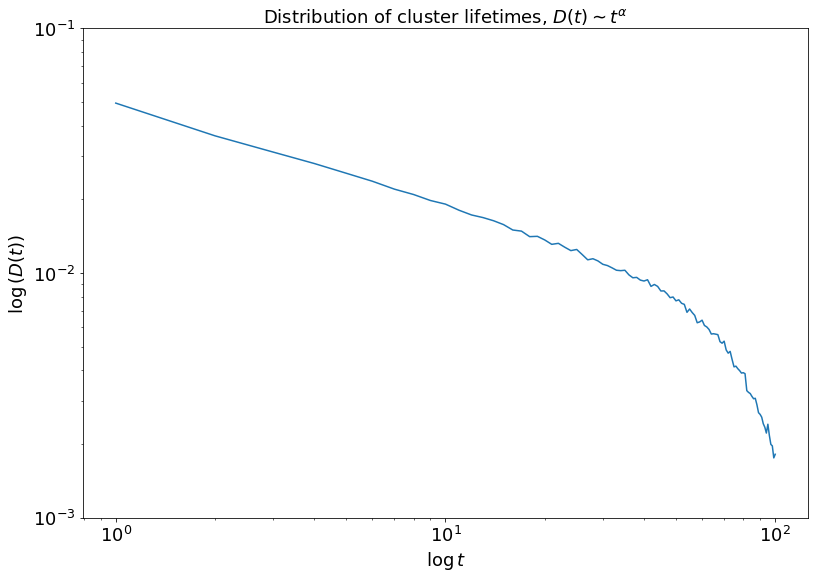

In [35]:
#Distribution of lifetimes
plt.figure(figsize=(13,9))
plt.plot(t[:100],ft[:100])
#plt.plot(x_vals, exp(x_vals, 10**(popt[0]), popt[1]),'r',label='linear model')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\log{t}$",fontsize=18)
plt.ylabel("$\log{(D(t))}$",fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.ylim([0.001,0.1])
plt.title("Distribution of cluster lifetimes, $D(t)\sim t^{α}$",fontsize=18)
plt.show()

## Linear regrassion to determine critical exponents

In [22]:
#linear function with parameter a,b in order to perform linear regression
def linear(x,a,b):
    return a+b*x

In [23]:
#exp function
def exp(x,a,b):
    return a*x**b

In [24]:
#for linear regression D(s)
popt, _ = opt.curve_fit(linear, np.log10(s[:100]), np.log10(f[:100]))
print("a,b estimates for the linear model:")
print("a=", popt[0])
print("b=", popt[1])

a,b estimates for the linear model:
a= -0.8426346925323067
b= -1.0263243995070646


In [25]:
#for linear regression D(t)
popt2, _ = opt.curve_fit(linear, np.log10(t[:25]), np.log10(ft[:25]))
print("a,b estimates for the linear model:")
print("a=", popt2[0])
print("b=", popt2[1])

a,b estimates for the linear model:
a= -1.2948304862354802
b= -0.43490481201473885


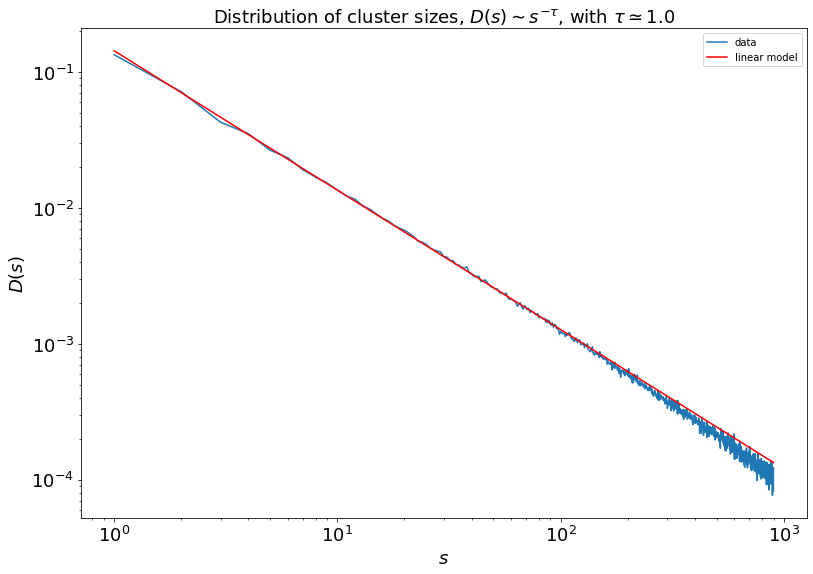

In [39]:
#Distribution of cluster sizes
plt.figure(figsize=(13,9))
plt.plot(s[:900],f[:900],label="data")
plt.plot(s[:900], exp(s[:900], 10**(popt[0]), popt[1]),'r',label='linear model')
plt.xscale("log")
plt.yscale("log")
#plt.xlabel("$\log{s}$",fontsize=18)
#plt.ylabel("$\log{(D(s))}$",fontsize=18)
plt.xlabel("$s$",fontsize=18)
plt.ylabel("$D(s)$",fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.title("Distribution of cluster sizes, $D(s)\sim s^{-τ}$, with $τ\simeq 1.0$",fontsize=18)
plt.legend()
plt.savefig("Clusters.png", transparent=True)
plt.show()

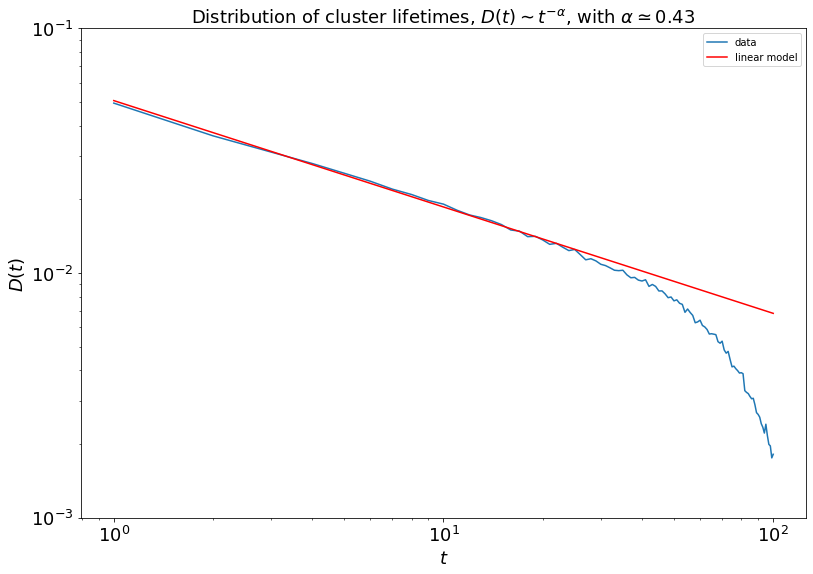

In [40]:
#Distribution of lifetimes
plt.figure(figsize=(13,9))
plt.plot(t[:100],ft[:100],label="data")
plt.plot(t[:100], exp(t[:100] ,10**(popt2[0]), popt2[1]),'r',label='linear model')
plt.xscale("log")
plt.yscale("log")
#plt.xlabel("$\log{t}$",fontsize=18)
#plt.ylabel("$\log{(D(t))}$",fontsize=18)
plt.xlabel("$t$",fontsize=18)
plt.ylabel("$D(t)$",fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.ylim([0.001,0.1])
plt.title("Distribution of cluster lifetimes, $D(t)\sim t^{-α}$, with $α\simeq 0.43$",fontsize=18)
plt.legend()
plt.savefig("times.png", transparent=True)
plt.show()